# Drug Consumptions (UCI)

## Problem formulation

The goal of the project is to determine whether certain personality characteristics influence the likelihood of drug use. The purpose of the model is to predict substance use based on psychological traits. It can be beneficial in identifying groups of individuals who are at risk of substance abuse, and therefore can support the planning health policies and designing prevention strategies.

The Drug Conspumption (UCI) data set contains records for 1885 respondents. These include their age, gender, level of education, country of residence, ethnicity, personality measurements and various substance use. Detailed description of the set and process of data quantification are presented in E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, "The Five Factor Model of personality and evaluation of drug consumption risk".

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display

df = pd.read_csv("Drug_Consumption.csv")

df.drop(columns=["ID"], inplace=True)

display(df)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


**Column overview:**


Categorical data:
1. `ID` — the number of the record
2. `Age` — the age group of the respondent
3. `Gender` — the gender of the respondent; Male or Female
4. `Education` — the level of education of the participant
4. `Country` — the country of origin of the participant
5. `Ethnicity` — the ethnicity of the participant


Personality measurements (numeric values):
6. `Nscore` — NEO-FFI-R Neuroticism
7. `Escore` — NEO-FFI-R Extraversion
8. `Oscore` — NEO-FFI-R Openness to experience
9. `Ascore` — NEO-FFI-R Agreeableness
10. `Cscore` — NEO-FFI-R Conscientiousness
11. `Impulsive` — impulsiveness measured by BIS-11
12. `SS` — sensation seeing measured by ImpSS


Substance usage:
13. `Alcohol` — alcohol consumption
14. `Amphet` — amphetamines consumption
15. `Amyl` — nitrite consumption
16. `Benzos` — benzodiazepine consumption
17. `Caff` — caffeine consumption
18. `Cannabis` — marijuana consumption
19. `Choc` — chocolate consumption
20. `Coke` — cocaine consumption
21. `Crack` — crack cocaine consumption
22. `Ecstasy` — ecstasy consumption
23. `Heroin` — heroin consumption
24. `Ketamine` — ketamine consumption
25. `Legalh` — legal highs consumption
26. `LSD` — LSD consumption
27. `Meth` — methadone consumption
28. `Mushroom` — magic mushroom consumption
29. `Nicotine` — nicotine consumption
30. `Semer` — class of fictitious drug Semeron consumption (i.e. control)
31. `VSA` — class of volatile substance abuse consumption


The records for columns 13-31 (substance usage) contain rating's:

* CL0 - never used
* CL1 - used over a decade ago
* CL2 - used in last decade
* CL3 - used in last year
* CL4 - used in last month
* CL5 - used in last week
* CL6 - used in last day

## Preprocessing

### Categorical data before preprocessing

The `Age` column was converted into numerical values so that the natural order of age groups is preserved. The `Gender` column was changed into a binary (0 corresponds to male, 1 to female). The `Education, Country, Ethnicity` columns were replaced with new binary columns representing each unique category. Those new columns can have either True or False value. All columns which contained information about whether the respodent left school at age 16, 17 or 18 were merged into a single column - `Left school before 18 years`. Such approach reduces data complexity, which makes it easier to interpret and visualise.

The rating's from the columns concerning drug consumption were converted into a binary format: 0 if the substance was never used or last used over a decade ago, 1 if the consumption was reported within the past ten years). This transformation makes the data more suitable for the modeling the occurrence of drug use rather than its frequency intesity.

In [30]:
import matplotlib.pyplot as plt

def plot_categorical_distribution(df, column, ax, label_map=None, sort_numerically=False, title=None):

    values = df[column].dropna()

    counts = values.value_counts()
    percents = counts / counts.sum() * 100

    sorted_counts = counts.sort_values(ascending=False)
    sorted_percents = percents[sorted_counts.index]
    counts = sorted_counts
    percents = sorted_percents

    if label_map:
        display_labels = counts.index.map(lambda x: label_map.get(x, x))
    else:
        display_labels = counts.index

    bars = ax.barh(display_labels, counts.values, color='skyblue', edgecolor='black')

    for bar, percent in zip(bars, percents):
        ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2,
                    f'{percent:.1f}%', ha='left', va='center', fontsize=9)

    ax.set_title(title or f'Distribution of {column}')
    ax.set_ylabel(column)
    ax.set_xlabel('Count')
    ax.set_xlim(0, counts.max() * 1.2)
    ax.grid(axis='x', linestyle='--', alpha=0.5)


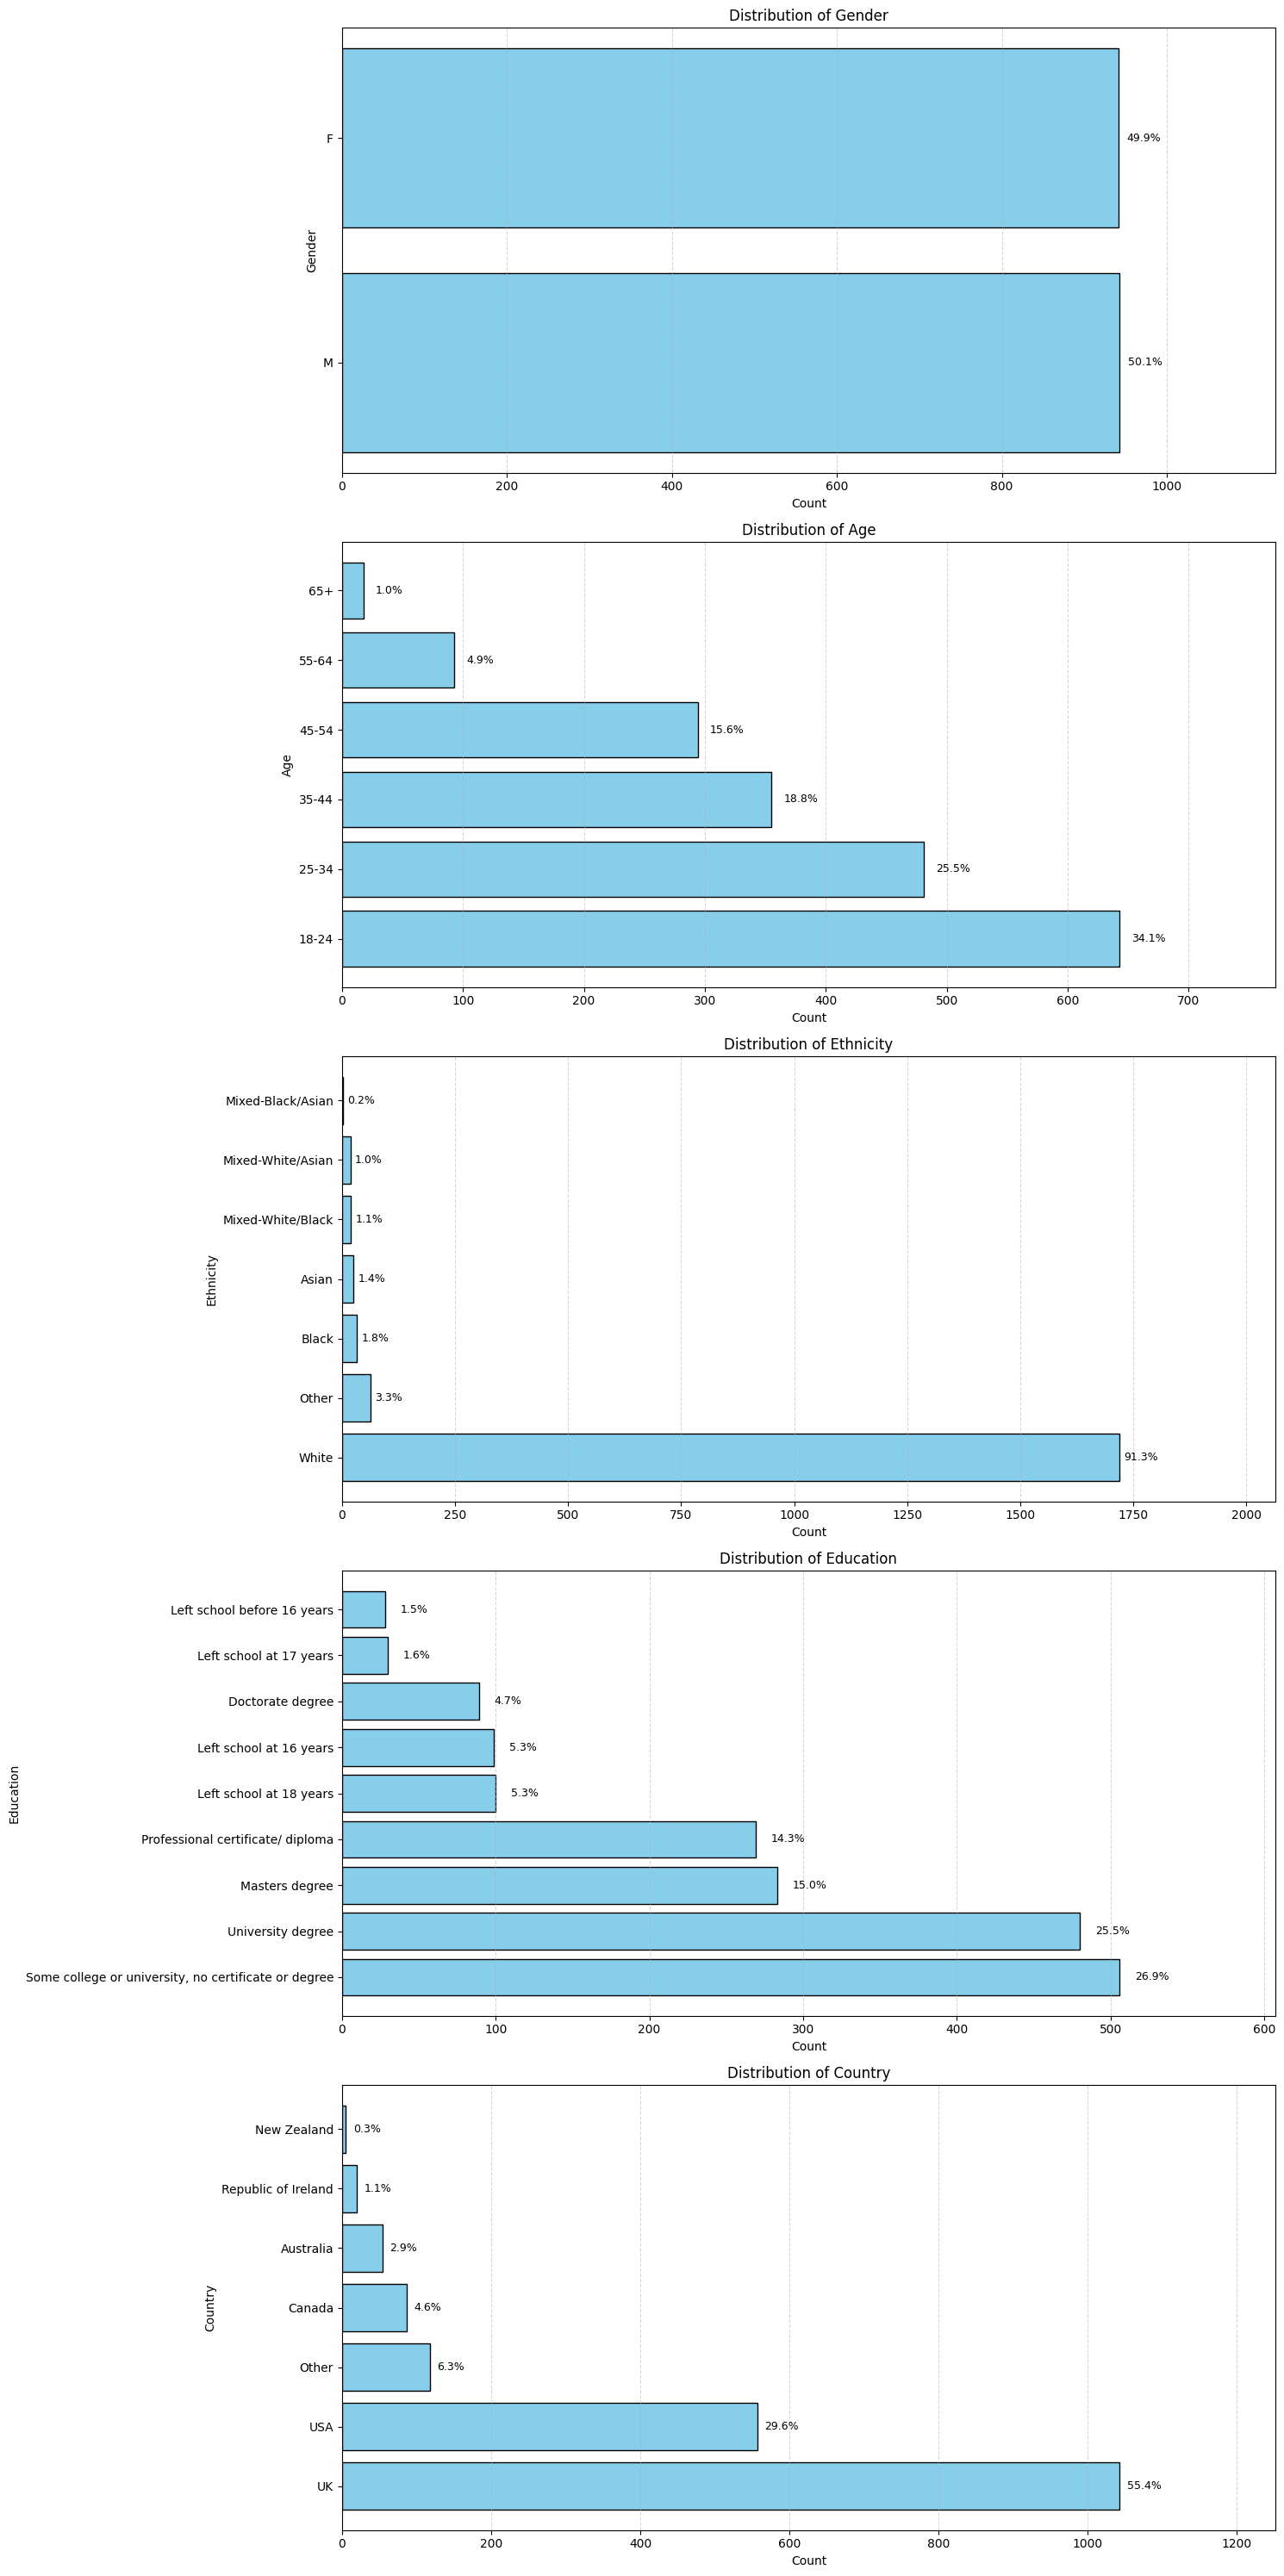

In [31]:
fig, axes = plt.subplots(5, 1, figsize=(15, 30))

columns = ['Gender', 'Age', 'Ethnicity', 'Education', 'Country']

for ax, col in zip(axes, columns):
    plot_categorical_distribution(df, col, ax=ax)

plt.tight_layout()
plt.show()


In [32]:
df.loc[df['Education'].str.contains('left school', case=False), 'Education'] = 'left school before 18 years'

age_mapping = {
    '18-24' : 1,
    '25-34' : 2,
    '35-44' : 3,
    '45-54' : 4,
    '55-64' : 5,
    '65+' : 6
}

gender_mapping = {
    'M' : 0,
    'F' : 1
}

df['Age'] = df['Age'].map(age_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)

df = pd.get_dummies(df, columns=['Education', 'Ethnicity', 'Country'], drop_first=True)

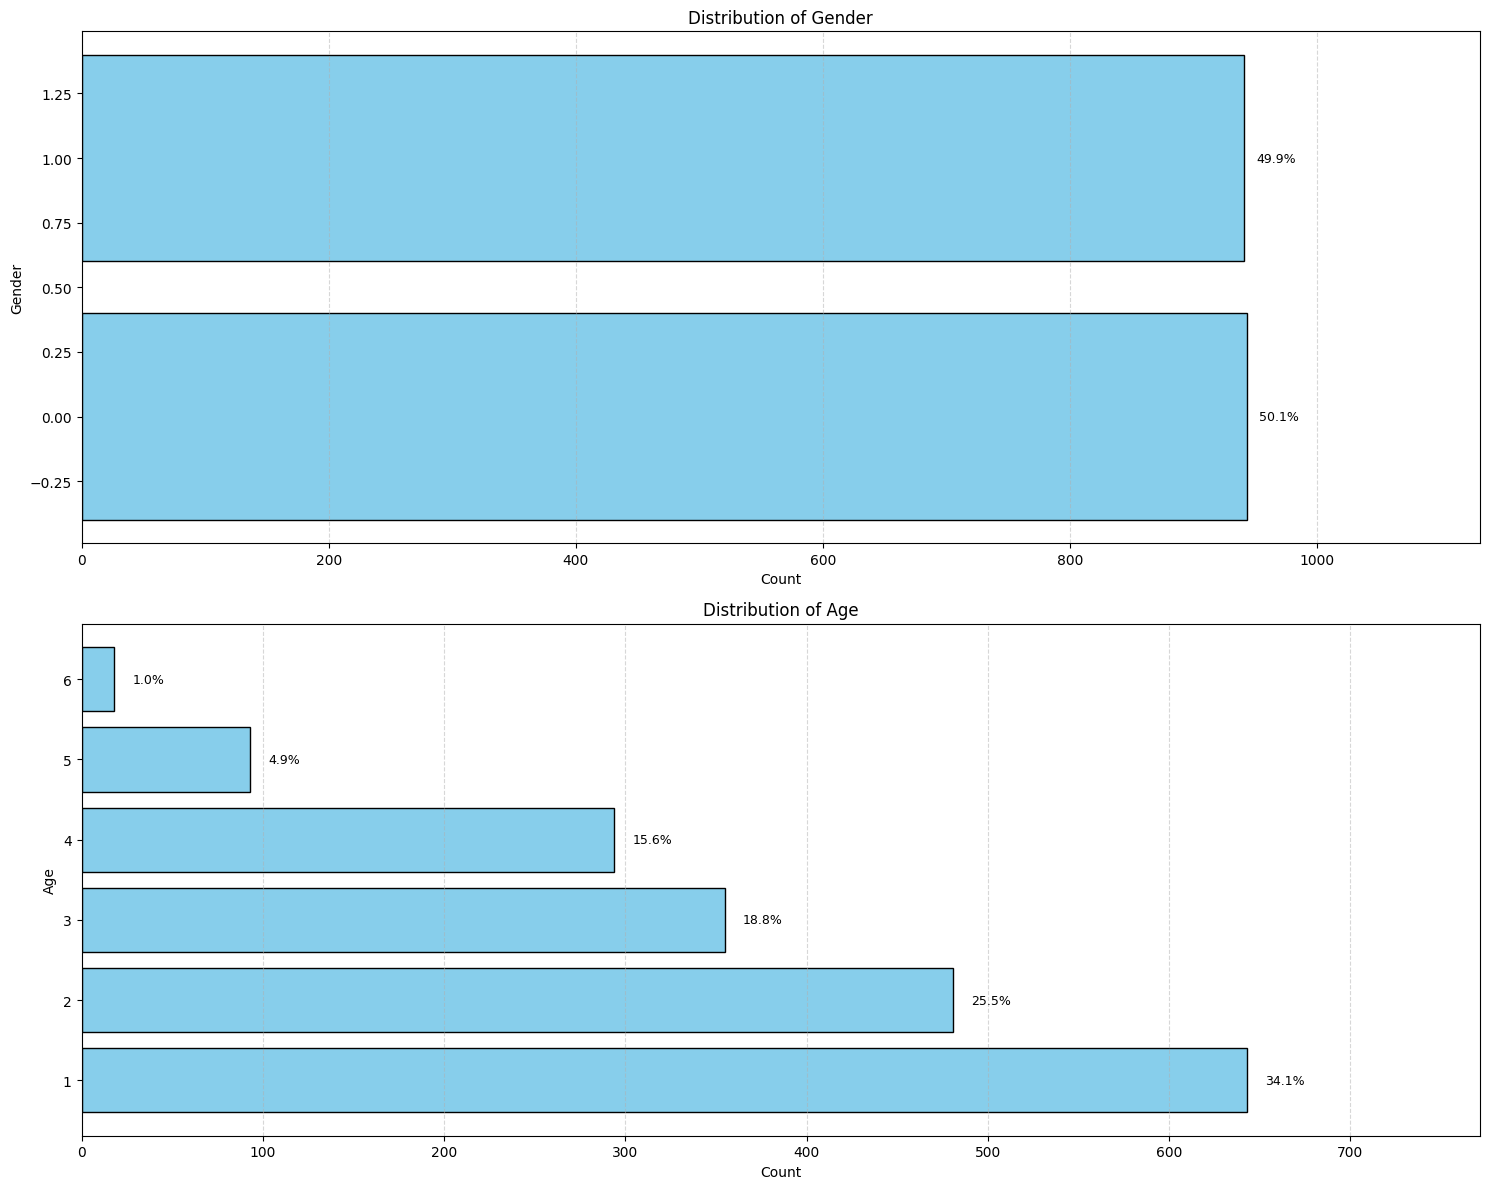

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

columns = ['Gender', 'Age']

for ax, col in zip(axes, columns):
    plot_categorical_distribution(df, col, ax=ax)

plt.tight_layout()
plt.show()

In [34]:
filtered_cols_country = [col for col in df.columns if col.startswith('Country')]
display(df[filtered_cols_country])

filtered_cols_education = [col for col in df.columns if col.startswith('Education')]
display(df[filtered_cols_education])

filtered_cols_ethnicity = [col for col in df.columns if col.startswith('Ethnicity')]
display(df[filtered_cols_ethnicity])

,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
1879,False,False,False,False,False,True
1880,False,False,False,False,False,True
1881,False,False,False,False,False,True
1882,False,False,False,False,False,True


,Education_Masters degree,Education_Professional certificate/ diploma,"Education_Some college or university, no certificate or degree",Education_University degree,Education_left school before 18 years
0,False,False,False,False,False
1,False,True,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
1879,False,False,True,False,False
1880,False,False,True,False,False
1881,False,False,False,True,False
1882,False,False,True,False,False


,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
1879,False,False,False,False,False,True
1880,False,False,False,False,False,True
1881,False,False,False,False,False,True
1882,False,False,False,False,False,True


### Drugs columns - preprocessing

In [35]:
usage_mapping = {
    'CL0': 0,  # Never used
    'CL1': 1,  # Used over a decade ago
    'CL2': 2,  # Used in last decade
    'CL3': 3,  # Used in last year
    'CL4': 4,  # Used in last month
    'CL5': 5,  # Used in last week
    'CL6': 6   # Used in last day
}

substance_cols = [
    'Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
    'Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth',
    'Mushrooms','Nicotine','Semer','VSA'
]

for col in substance_cols:
    df[col] = df[col].map(usage_mapping)

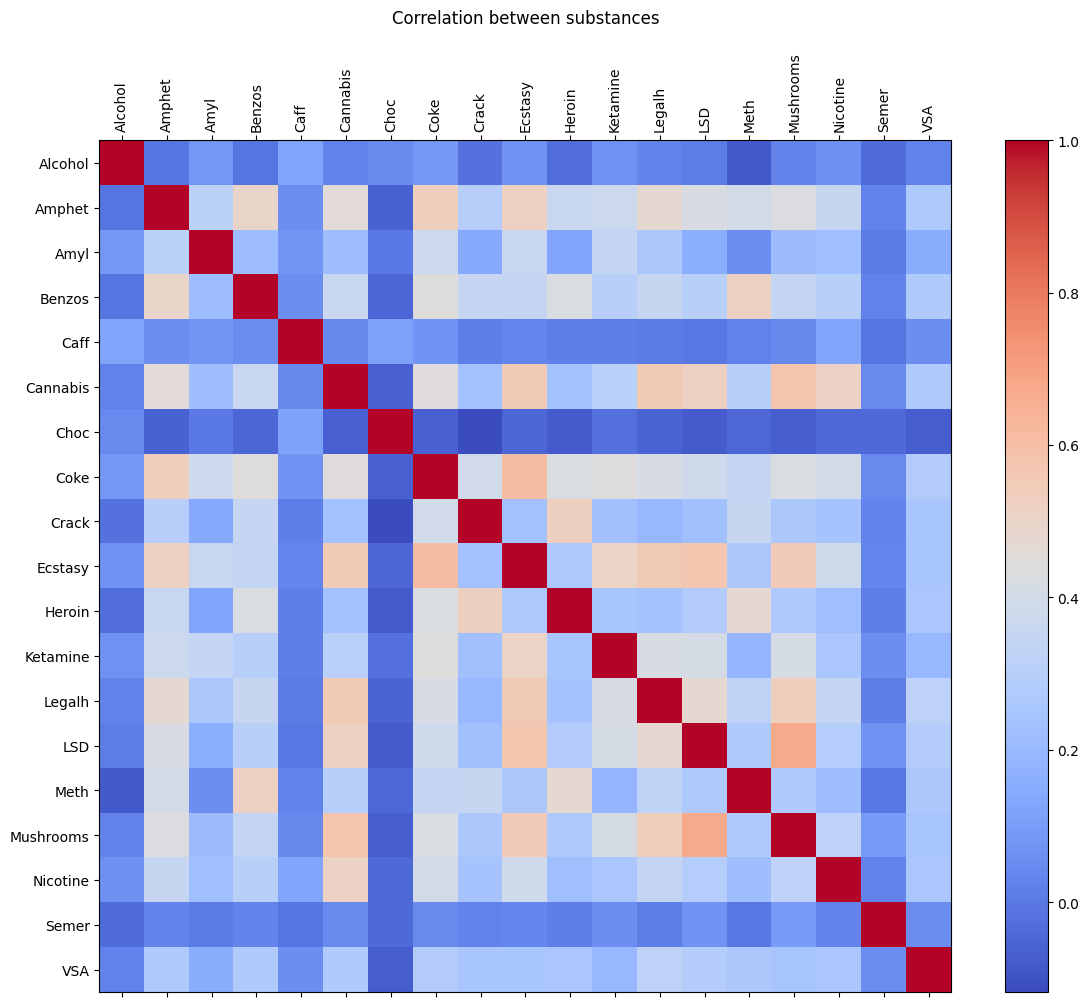

<ipython-input-36-0109e664a6f6>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df[substance_cols].applymap(lambda x: 0 if x == 0 else 1)


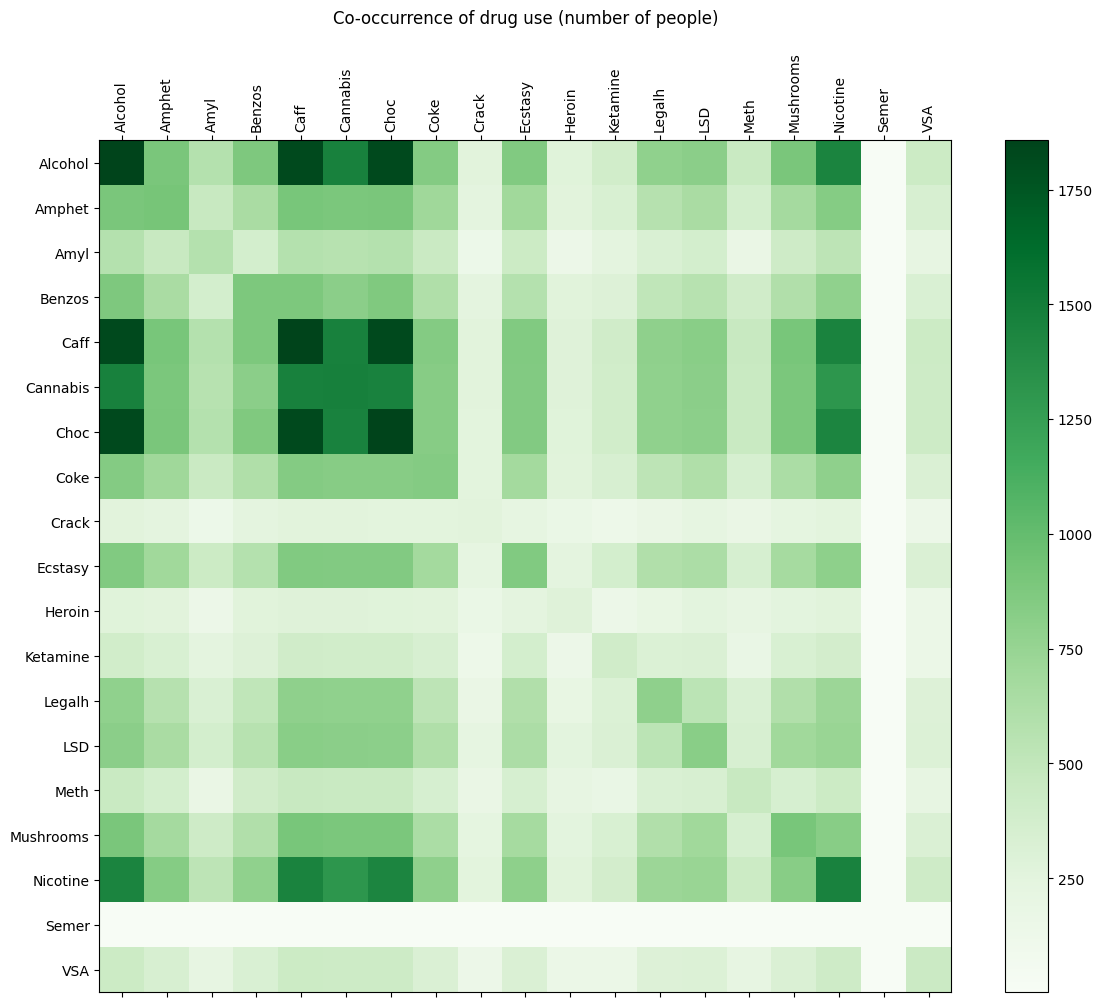

In [36]:
corr = df[substance_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(substance_cols)), substance_cols, rotation=90)
plt.yticks(range(len(substance_cols)), substance_cols)
fig.colorbar(cax)
plt.title("Correlation between substances", pad=20)
plt.tight_layout()
plt.show()

df_binary = df[substance_cols].applymap(lambda x: 0 if x == 0 else 1)

# Co-occurrence matrix
co_occur = df_binary.T.dot(df_binary)

# Visualisation
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(co_occur, cmap='Greens')
plt.xticks(range(len(substance_cols)), substance_cols, rotation=90)
plt.yticks(range(len(substance_cols)), substance_cols)
fig.colorbar(cax)
plt.title("Co-occurrence of drug use (number of people)", pad=20)
plt.tight_layout()
plt.show()

In [37]:
# Binary format

usage_mapping = {
    0 : 0,  # Never used
    1: 0,  # Used over a decade ago
    2: 1,  # Used in last decade
    3: 1,  # Used in last year
    4: 1,  # Used in last month
    5: 1,  # Used in last week
    6: 1   # Used in last day
}

substance_cols = [
    'Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
    'Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth',
    'Mushrooms','Nicotine','Semer','VSA'
]

for col in substance_cols:
    df[col] = df[col].map(usage_mapping)

display(df[substance_cols])

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
1880,1,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0
1881,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,0
1882,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0


### Personality - preprocessing

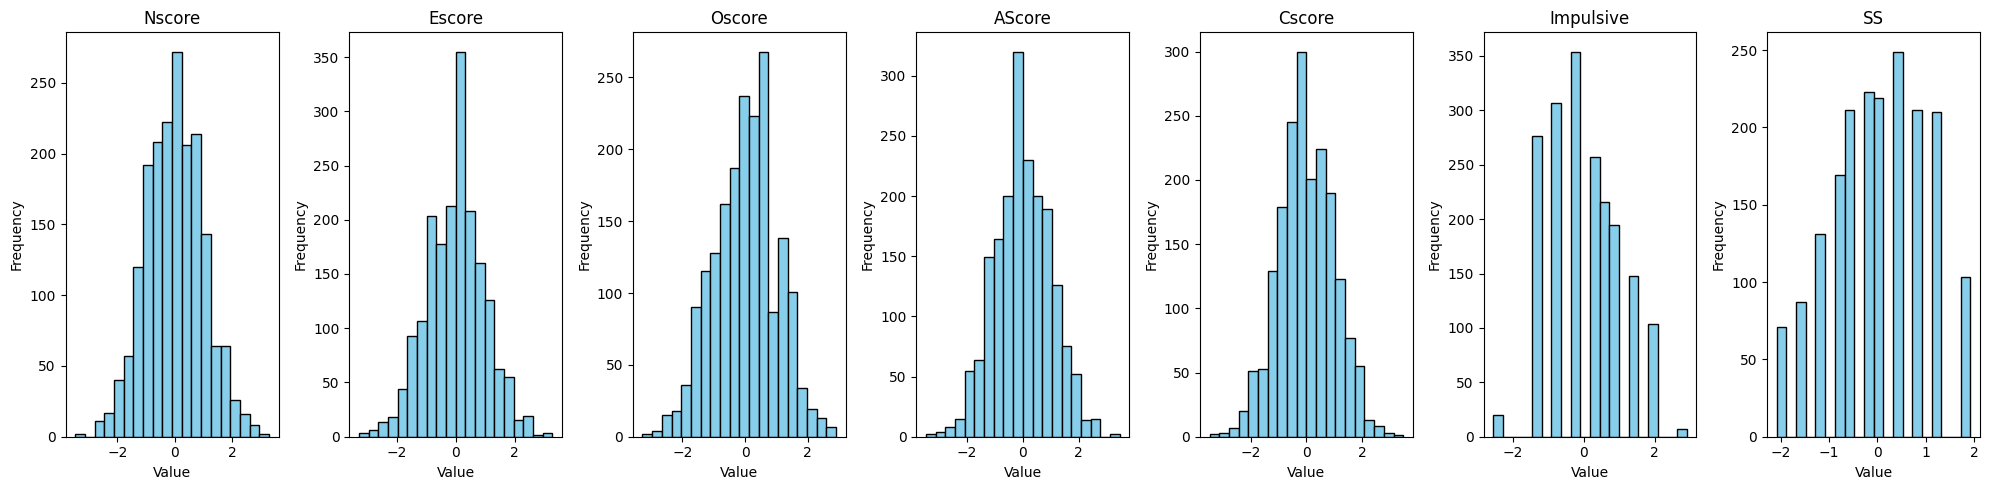

In [38]:
columns = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']

fig, axes = plt.subplots(1, 7, figsize=(20, 5))

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()